# Describing Distributions

 The features to analyze: 
* VitD_levels
* Doc_visits
* TotalCharge

For each feature listed:

* Plot a histogram with a kde (kernel density estimate)
* Add a line for the mean (red)
* Add a line for the median (green)
* Add a line for for +1 std from the mean (black)
* Add a line for the - 1 std from the mean (black)
* Highlight the range between +1 and =1 std (yellow)

-Answer the following questions:

* Is it Discrete or Continuous?

* Does it have a skew? If so, which direction (+/-)
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

### Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from scipy.stats import norm, kurtosis

plt.style.use(['seaborn-muted','fivethirtyeight'])
sns.set_context('talk')
Medical = "data (6).csv"
df = pd.read_csv(Medical)


C:\Users\ROSA\AppData\Local\Temp\ipykernel_26772\2435195354.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-muted','fivethirtyeight'])


In [9]:
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

# VitD_levels

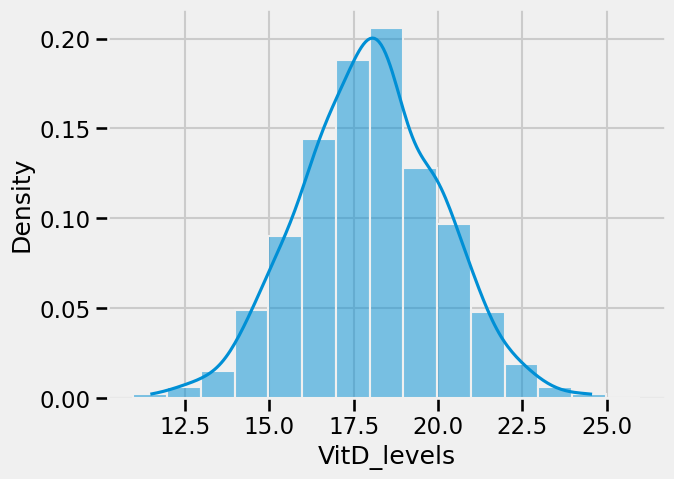

In [13]:
sns.histplot(data=df, x='VitD_levels', discrete=True, stat='density', kde = True);

In [14]:
# Calculate the mean
# Find the mean
mean = df['VitD_levels'].mean()
mean

17.992380894860002

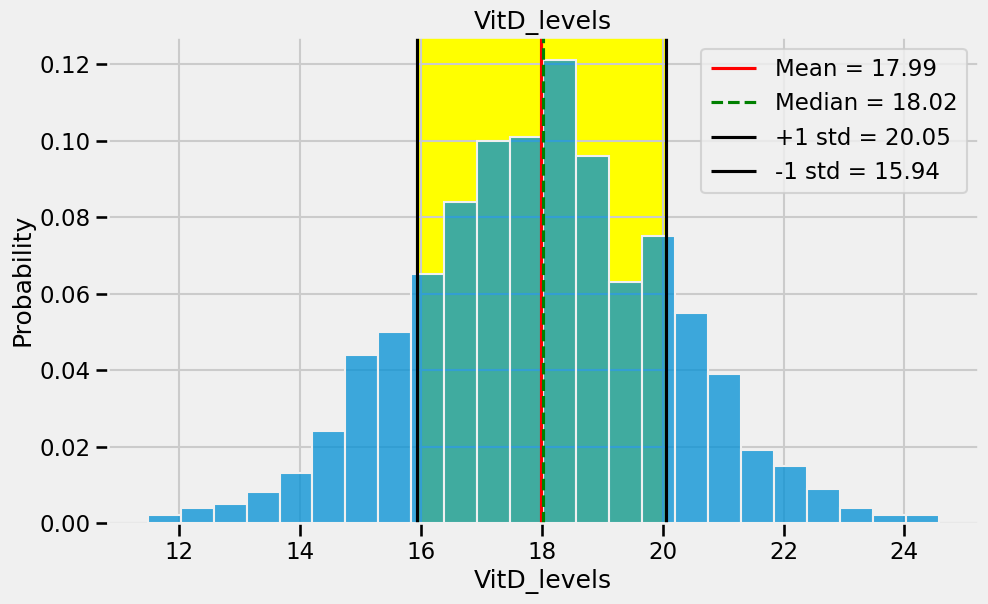

In [32]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [59]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
if kurt == 3.0:
    print(f"Kurtosis: {kurt}; Mesokurtic")
elif kurt > 3.0:
    print(f"Kurtosis: {kurt}; Leptokurtic")
else:
    print(f"Kurtosis: {kurt}; Platykurtic")  

Kurtosis: 3.013147515833447; Leptokurtic


### Is it Discrete or Continuous? 
* Continuous 

### Does it have a skew? If so, which direction (+/-)

* Normal (no skew)

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

* Leptokurtic

# Doc_visits

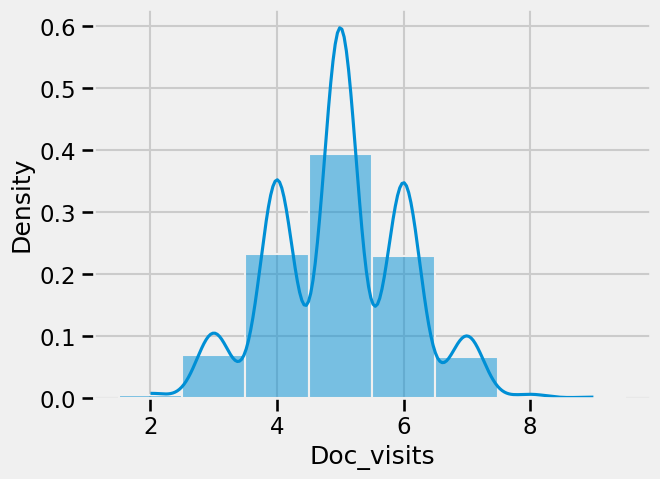

In [23]:
sns.histplot(data=df, x='Doc_visits', discrete=True, stat='density', kde = True);

In [24]:
# Calculate the mean
# Find the mean
mean = df['Doc_visits'].mean()
mean

4.992

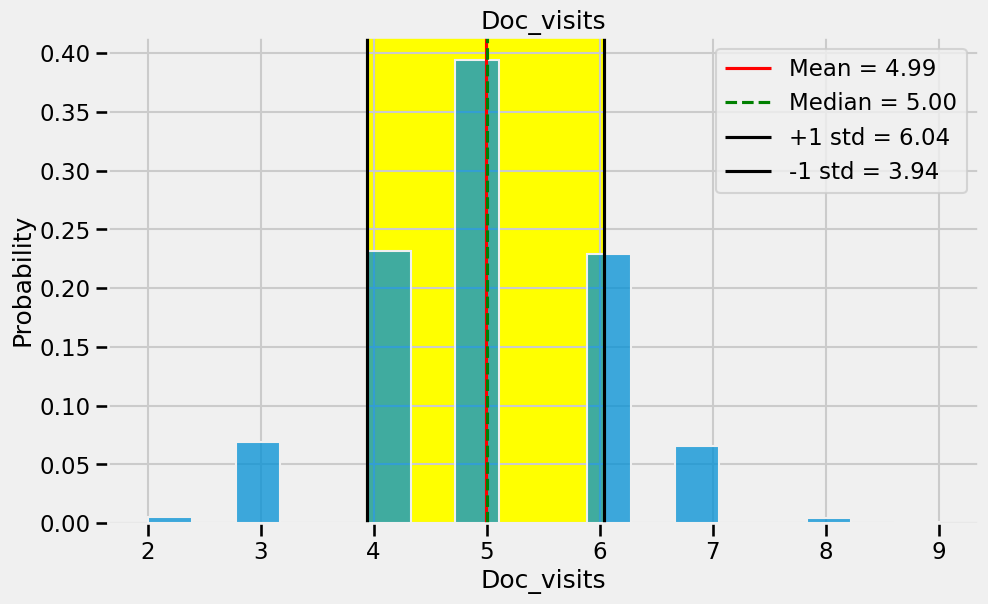

In [33]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [60]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
if kurt == 3.0:
    print(f"Kurtosis: {kurt}; Mesokurtic")
elif kurt > 3.0:
    print(f"Kurtosis: {kurt}; Leptokurtic")
else:
    print(f"Kurtosis: {kurt}; Platykurtic")  

Kurtosis: 2.9919958083381206; Platykurtic


### Is it Discrete or Continuous?

* Discrete

### Does it have a skew? If so, which direction (+/-)

* Normal (no skew)

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

* Platykurtic

# Totalcharge

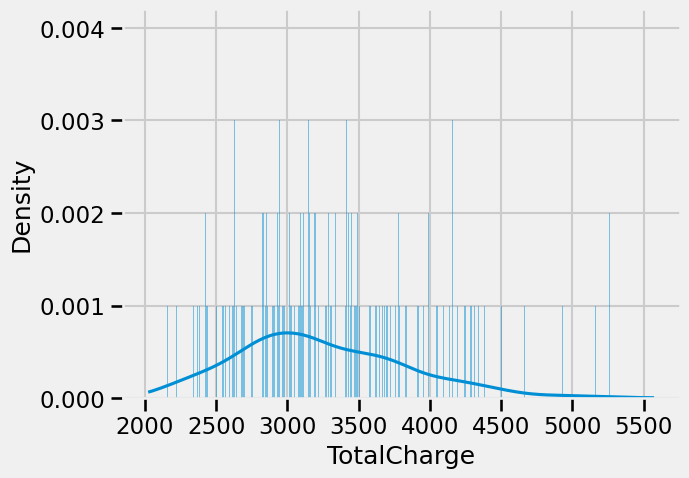

In [27]:
sns.histplot(data=df, x='TotalCharge', discrete=True, stat='density', kde = True);

In [29]:
# Calculate the mean
# Find the mean
mean = df['TotalCharge'].mean()
mean

3240.9716133389998

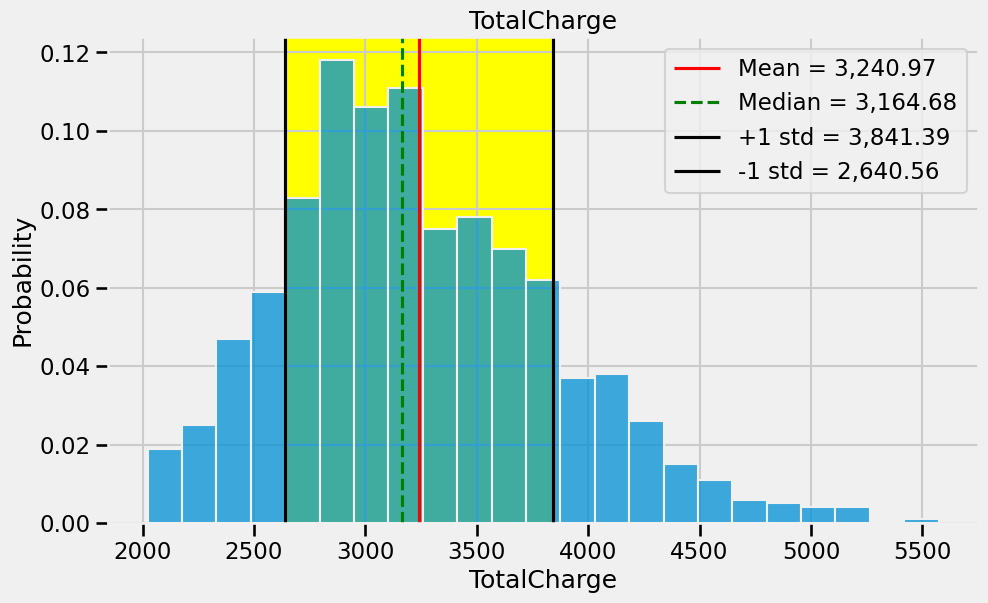

In [36]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();


In [52]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)

In [53]:
TotalCharge = norm.rvs(size=1000, random_state=3)
kurtosis(TotalCharge)
-0.06928694200380558

-0.06928694200380558

In [58]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
if kurt == 3.0:
    print(f"Kurtosis: {kurt}; Mesokurtic")
elif kurt > 3.0:
    print(f"Kurtosis: {kurt}; Leptokurtic")
else:
    print(f"Kurtosis: {kurt}; Platykurtic")  

Kurtosis: 3.2650077463439384; Leptokurtic


### Is it Discrete or Continuous?

* Continuous

### Does it have a skew? If so, which direction (+/-)

* positively skewed

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

* Leptokurtic